## 목차

- EDA?
- EDA의 Process
- 예시 데이터를 바탕으로 EAD 진행하기

### EDA 

: 데이터 그 자체로, 데이터의 본질과 특성을 얻을 수 있는 접근법

### EDA Process

<단계>

1. 분석의 목적(결과 명확히)과 변수 확인(column)
2. 데이터 전체적으로 살펴보기 (상관관계 N/A 유무)
3. 데이터의 개별 속성 파악하기

### EDA Example - Titanic

- csv 파일 다운로드

#### 단계0. 라이브러리 준비

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
# csv 불러오기

titanic_df = pd.read_csv("./train.csv")

#### 단계 1. 분석의 목적과 변수 확인

- 분석의 목적: 살아남은 사람들은 어떤 특징을 갖고 있나?
- 변수 확인: 10개종 

In [4]:
titanic_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# 데이터 타입 확인하기

titanic_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

#### 단계2. 데이터 전체적으로 살펴보기

In [7]:
## 데이터 전체 정보를 얻는 함수: .describe()

titanic_df.describe()  #수치형 데이터에 대한 요약본 제공

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
# 상관계수 확인

titanic_df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


#### *

상관성과 인과성을 구분해야 함!

(Correlation is NOT Causation)

- 상관성: A UP, B UP
- 인과성: A -> B

In [13]:
# 결측치 확인

titanic_df.isnull().sum()

# age cabin embarked에서 결측치 발견!

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### 단계3. 데이터의 개별 속성 파악하기

1. Survied Coulumn

In [17]:
# 생존자, 사망자 명수는?

titanic_df['Survived'].sum()

342

In [18]:
titanic_df['Survived'].value_counts()  # 각 데이터가 몇 번 등장했는지 확인할 수 있는 함수

0    549
1    342
Name: Survived, dtype: int64

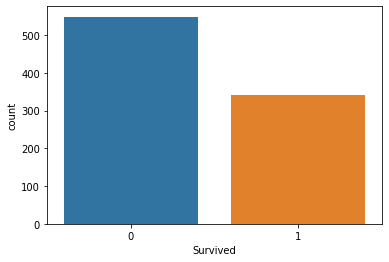

In [23]:
# 생존자 수와 사망자 수를 Barplot으로 그려보기 sns.countplot()

sns.countplot(x='Survived', data = titanic_df)

plt.show()

2. Pcalss

In [24]:
# Pcalss 에 따른 인원 파악

titanic_df[['Pclass', 'Survived']]

,Pclass,Survived
0,3,0
1,1,1
2,3,1
3,1,1
4,3,0
...,...,...
886,2,0
887,1,1
888,3,0
889,1,1


In [26]:
titanic_df[['Pclass', 'Survived']].groupby(['Pclass'])

In [27]:
titanic_df[['Pclass', 'Survived']].groupby(['Pclass']).count()

,Survived
Pclass,
1,216
2,184
3,491


In [28]:
# 생존자 인원

titanic_df[['Pclass', 'Survived']].groupby(['Pclass']).sum()

,Survived
Pclass,
1,136
2,87
3,119


In [30]:
# 전체 인원 대비 생존자 수(생존비율)

titanic_df[['Pclass', 'Survived']].groupby(['Pclass']).mean()    #상관관계 확인

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


[]

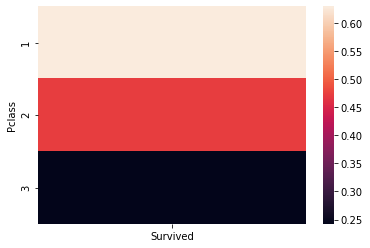

In [31]:
#히트맵 활용

sns.heatmap(titanic_df[['Pclass', 'Survived']].groupby(['Pclass']).mean())
plt.plot()

3. 성별

In [32]:
titanic_df[['Sex', 'Survived']]

,Sex,Survived
0,male,0
1,female,1
2,female,1
3,female,1
4,male,0
...,...,...
886,male,0
887,female,1
888,female,0
889,male,1


In [33]:
titanic_df.groupby(['Survived', 'Sex']).count()

PassengerId  Pclass  Name  Age  SibSp  Parch  Ticket  Fare  \
Survived Sex                                                                  
0        female           81      81    81   64     81     81      81    81   
         male            468     468   468  360    468    468     468   468   
1        female          233     233   233  197    233    233     233   233   
         male            109     109   109   93    109    109     109   109   

                 Cabin  Embarked  
Survived Sex                      
0        female      6        81  
         male       62       468  
1        female     91       231  
         male       45       109

In [35]:
titanic_df.groupby(['Survived', 'Sex'])['Survived'].count()

Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
Name: Survived, dtype: int64

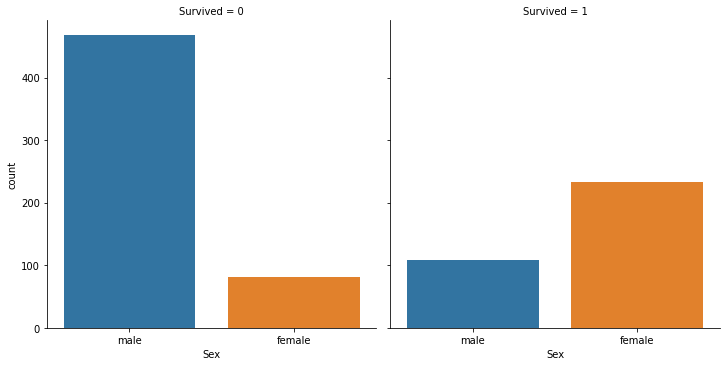

In [38]:
# sns.catplot

sns.catplot(x='Sex', col = 'Survived', kind = 'count', data = titanic_df)
plt.show()

4. 나이

- 결측치 존재

In [40]:
titanic_df.describe()['Age']

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [41]:
titanic_df[titanic_df.Survived == 1]['Age']

1      38.0
2      26.0
3      35.0
8      27.0
9      14.0
       ... 
875    15.0
879    56.0
880    25.0
887    19.0
889    26.0
Name: Age, Length: 342, dtype: float64

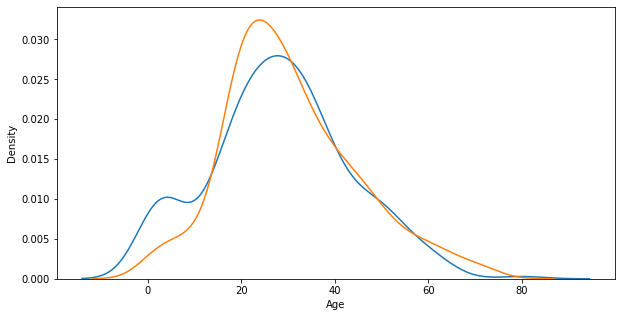

In [46]:
# survived 1, 0과 age의 경향성

# figure - > axis -> plot

fig, ax = plt.subplots(1, 1, figsize = (10, 5))    # 여러 개의 plot을 한번에 보여주는 함수
sns.kdeplot(x = titanic_df[titanic_df.Survived == 1]['Age'], ax= ax)
sns.kdeplot(x = titanic_df[titanic_df.Survived == 0]['Age'], ax=ax)

plt.show()

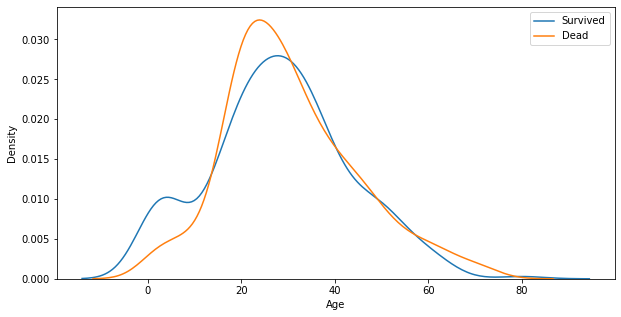

In [47]:
fig, ax = plt.subplots(1, 1, figsize = (10, 5))    # 여러 개의 plot을 한번에 보여주는 함수
sns.kdeplot(x = titanic_df[titanic_df.Survived == 1]['Age'], ax= ax)
sns.kdeplot(x = titanic_df[titanic_df.Survived == 0]['Age'], ax=ax)

plt.legend(['Survived', 'Dead'])

plt.show()

부록.

복합비교
- 성별과 p클래스 vs 생존자

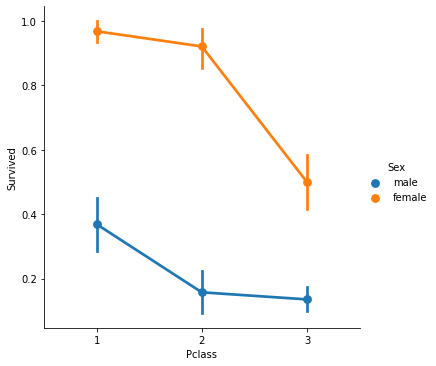

In [50]:
sns.catplot(x = 'Pclass', y = 'Survived', hue = 'Sex', kind = 'point', data = titanic_df)
plt.show()    # hue 두 개로 나눠서 보여주는

Age Pclass 비교

In [51]:
# Age graph with Pclass

titanic_df['Age'][titanic_df.Pclass == 1]

1      38.0
3      35.0
6      54.0
11     58.0
23     28.0
       ... 
871    47.0
872    33.0
879    56.0
887    19.0
889    26.0
Name: Age, Length: 216, dtype: float64

<AxesSubplot:ylabel='Density'>

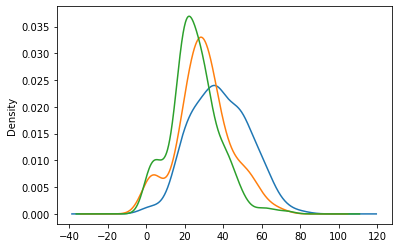

In [53]:
titanic_df['Age'][titanic_df.Pclass == 1].plot(kind = 'kde')
titanic_df['Age'][titanic_df.Pclass == 2].plot(kind = 'kde')
titanic_df['Age'][titanic_df.Pclass == 3].plot(kind = 'kde')     #class별 확인 가능

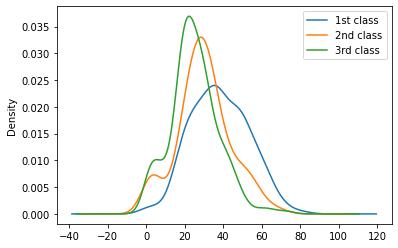

In [54]:
titanic_df['Age'][titanic_df.Pclass == 1].plot(kind = 'kde')
titanic_df['Age'][titanic_df.Pclass == 2].plot(kind = 'kde')
titanic_df['Age'][titanic_df.Pclass == 3].plot(kind = 'kde') 

plt.legend(['1st class', '2nd class', '3rd class'])
plt.show()













# Assignment

### 1. 본문에서 언급된 Feature를 제외하고 유의미한 Feature를 1개 이상 찾아봅시다.   

힌트: Fare? Sibsp? Parch?

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
titanic_df = pd.read_csv("./train.csv")

In [4]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
titanic_df[['Parch', 'Survived']]

,Parch,Survived
0,0,0
1,0,1
2,0,1
3,0,1
4,0,0
...,...,...
886,0,0
887,0,1
888,2,0
889,0,1


In [10]:
titanic_df[['Parch', 'Survived']].groupby(['Parch']).count()

,Survived
Parch,
0,678
1,118
2,80
3,5
4,4
5,5
6,1


In [11]:
titanic_df[['Parch', 'Survived']].groupby(['Parch']).sum()

,Survived
Parch,
0,233
1,65
2,40
3,3
4,0
5,1
6,0


In [9]:
titanic_df[['Parch', 'Survived']].groupby(['Parch']).mean()

,Survived
Parch,
0,0.343658
1,0.550847
2,0.500000
3,0.600000
4,0.000000
5,0.200000
6,0.000000


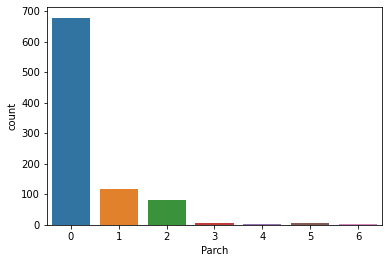

In [13]:
sns.countplot(x=titanic_df['Parch'])

plt.show()

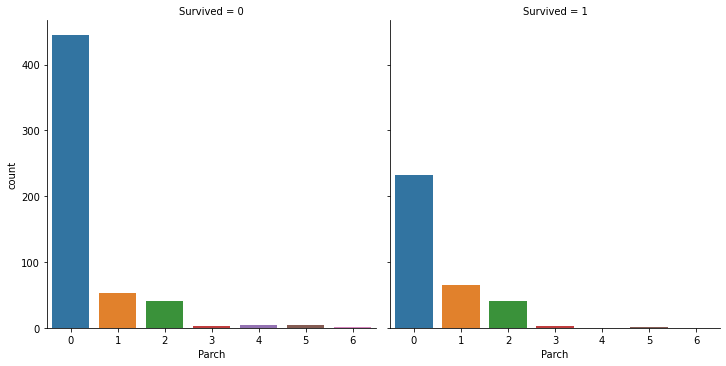

In [12]:
sns.catplot(x='Parch', col = 'Survived', kind = 'count', data = titanic_df)
plt.show()

### 유의미한 특징 (Parch)

[ Parch: 부모님이나 자녀와 동승한 경우 ]

- 부모님이나 자녀와 동승한 사람 수보다 혼자 탑승한 사람 수가 더 많음
- 혼자 탑승한 사람의 생존율 < 부모님이나 자녀와 동승한 사람의 생존율

호준님) 질문하기: 마지막 그래프를 하나로 비교하기 쉽게 하고 싶은데 어떻게 하는

## 2. kaggle에서 Dataset을 찾고, 이 Dataset에서 유의미한 Feature을 3개 이상 찾고 이를 시각화해라.

함께 보면 좋은 라이브러리 document

- numpy
- pandas
- seaborn
- matplotlib


Hint!

1. 데이터를 톺아본다
- 각 데이터는 어떤 자료형을 갖고 있나?
- 데이터에 결측치는 없나? > 있다면 어떻게 메꿔줄 수 있나?
- 데이터의 자료형을 바꿔줄 필요가 있나? -> 범주형의 One hot encoding

2. 데이터에 대한 가설을 세운다
- 가설은 개인의 경험에 의해서 도출되어도 상관없다
- 가설은 명확할수록 좋다 

3. 가설을 검증하기 위한 증거를 찾아본다
- 이 증거는 한 눈에 보이지 않을 수 있다. 우리가 다른 여러 기술을 써줘야 한다
- 그룹바이를 통해서 그룹화된 정보에 통계량을 도입하면 어떨까?
- 머지를 통해서 두 개 이상의 데이터프레임을 합치면 어떨까?
- 시각화를 통해 일목요연하게 보여주면 더욱 좋겠다@

### 1. data 톺아보기

< 분석의 목적과 변수 확인 >

분석의 목적

1. 구글플레이스토어에서 어떤 장르의 어플이 많은가?  
2.  무료/유료 어플 중 어떤 어플이 더 많은가? 
3.  어플 콘텐츠 등급은 어떤 나이대가 더 많은가?
             
변수 확인: 13개종

App                
Category           
Rating            
Reviews            
Size
Installs           
Type               
Price              
Content Rating     
Genres             
Last Updated       
Current Ver        
Android Ver 

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [36]:
app_df = pd.read_csv("./app.csv")
app_df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [37]:
app_df.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [38]:
app_df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [43]:
app_df.describe() # 상관계수 확인 (이렇게 클 수가 있나?)

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [44]:
app_df.isnull().sum()

# Rating, Content Rating, Android Ver 결측치 존재

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

개별 속성 확인하기

In [46]:
app_df['Genres']

0                     Art & Design
1        Art & Design;Pretend Play
2                     Art & Design
3                     Art & Design
4          Art & Design;Creativity
                   ...            
10836                    Education
10837                    Education
10838                      Medical
10839            Books & Reference
10840                    Lifestyle
Name: Genres, Length: 10841, dtype: object

In [47]:
app_df['Genres'].unique()

array(['Art & Design', 'Art & Design;Pretend Play',
       'Art & Design;Creativity', 'Art & Design;Action & Adventure',
       'Auto & Vehicles', 'Beauty', 'Books & Reference', 'Business',
       'Comics', 'Comics;Creativity', 'Communication', 'Dating',
       'Education;Education', 'Education', 'Education;Creativity',
       'Education;Music & Video', 'Education;Action & Adventure',
       'Education;Pretend Play', 'Education;Brain Games', 'Entertainment',
       'Entertainment;Music & Video', 'Entertainment;Brain Games',
       'Entertainment;Creativity', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Lifestyle;Pretend Play',
       'Adventure;Action & Adventure', 'Arcade', 'Casual', 'Card',
       'Casual;Pretend Play', 'Action', 'Strategy', 'Puzzle', 'Sports',
       'Music', 'Word', 'Racing', 'Casual;Creativity',
       'Casual;Action & Adventure', 'Simulation', 'Adventure', 'Board',
       'Trivia', 'Role 

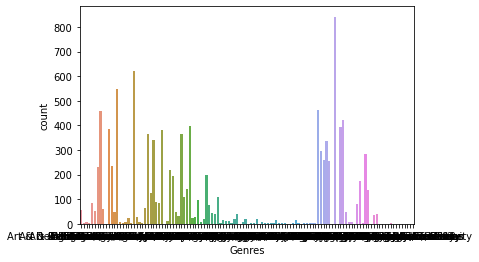

<Figure size 1440x1080 with 0 Axes>

In [66]:
sns.countplot(x=app_df['Genres'])

plt.figure(figsize=(20, 15))


plt.show()            

In [67]:
app_df['Genres'].count()

10841

In [71]:
app_df['Genres'].value_counts()    # 그래프에 글씨가 잘려서.... 

Tools                       842
Entertainment               623
Education                   549
Medical                     463
Business                    460
                           ... 
Lifestyle;Education           1
Role Playing;Brain Games      1
Lifestyle;Pretend Play        1
Role Playing;Education        1
February 11, 2018             1
Name: Genres, Length: 120, dtype: int64

## 구글플레이스토어에는 Tools 분야의 어플이 가장 많음!

In [72]:
app_df['Price']

0        0
1        0
2        0
3        0
4        0
        ..
10836    0
10837    0
10838    0
10839    0
10840    0
Name: Price, Length: 10841, dtype: object

In [80]:
app_df['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', 'Everyone', '$1.20', '$1.04'], dtype=object)

In [83]:
app_df[app_df['Price'] == 0]

app_df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [87]:
app_df['Type'].unique()

array(['Free', 'Paid', nan, '0'], dtype=object)

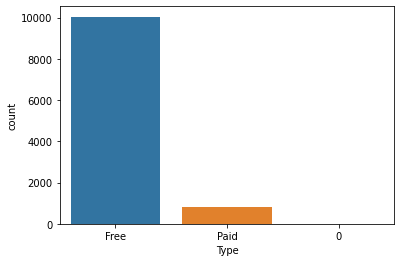

In [86]:
sns.countplot(x='Type', data = app_df)

plt.show()

## 구글플레이스토어, 무료 APP 수 > 유료 APP 수

In [88]:
app_df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [91]:
app_df['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated', nan], dtype=object)

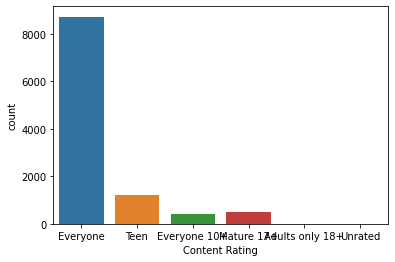

<Figure size 216x216 with 0 Axes>

In [92]:
sns.countplot(x=app_df['Content Rating'])

plt.figure(figsize=(3, 3))

plt.show()

## 구글플레이스토어 콘텐츠 나이대

Everyone > Teen > Mature 17+ > Everyone 10+ > Adults only 18+ = Unrated